## Plots of time series for BY and BKY

In [1]:
include("bansal_yaron_discretized.jl")

compute_fp_by

In [2]:
using QuantEcon

#### Bansal Yaron Parameters

In [3]:
T = 15000

15000

In [4]:
function sim_consumption(sv::StochasticVolatility, 
                            I=10,
                            J=10,
                            μ=0.0015, 
                            ts_length=T)

    x, Q = discretize_sv(sv, I, J)
    M = I * J

    mc = MarkovChain(Q, [x[:, m] for m in 1:M])

    c_growth = Vector{Float64}(ts_length)
    z_vals = Vector{Float64}(ts_length)
    σ_vals = Vector{Float64}(ts_length)

    ts = simulate(mc, ts_length)
    for t in 1:ts_length
        z, σ = ts[t]
        z_vals[t] = z
        σ_vals[t] = σ
        c_growth[t] = μ + z + σ * randn()
    end
    
    return σ_vals, z_vals, c_growth
end

sim_consumption (generic function with 5 methods)

In [5]:
sv_by = StochasticVolatilityBY()
sv_bky = StochasticVolatilityBKY()

StochasticVolatility{Float64}(0.975, 0.038, 0.999, 5.1840000000000046e-8, 2.8e-6)

In [6]:
σ_by, z_by, c_by = sim_consumption(sv_by)
σ_bky, z_bky, c_bky = sim_consumption(sv_bky);

In [7]:
using PyPlot
plt = PyPlot

PyPlot

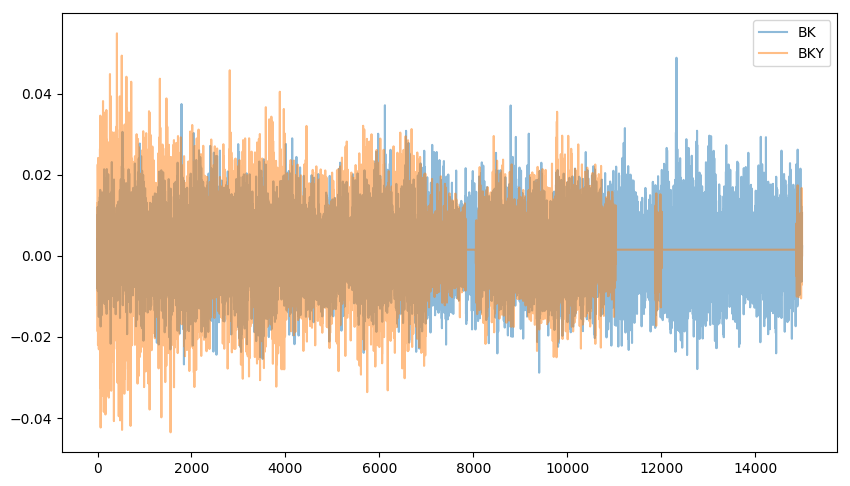

In [8]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, c_by, label="BK", alpha=0.5)
ax[:plot](1:T, c_bky, label="BKY", alpha=0.5)
ax[:legend]()

plt.show()

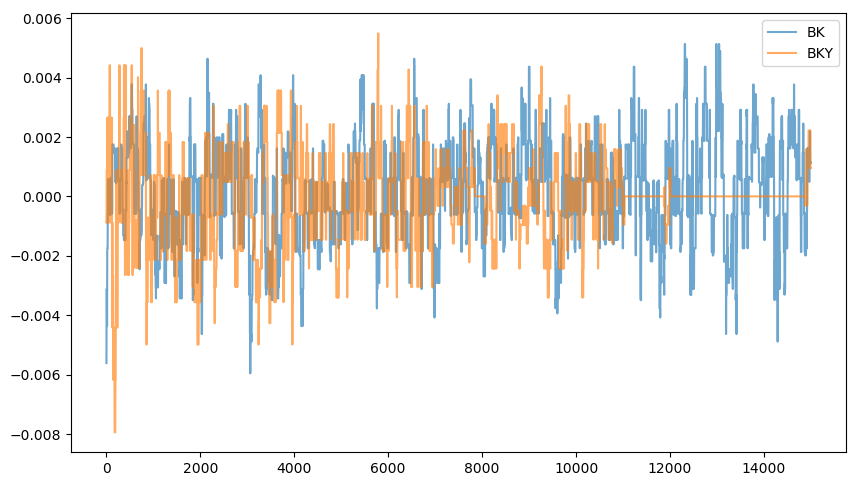

In [9]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, z_by, label="BK", alpha=0.65)
ax[:plot](1:T, z_bky, label="BKY", alpha=0.65)
ax[:legend]()

plt.show()

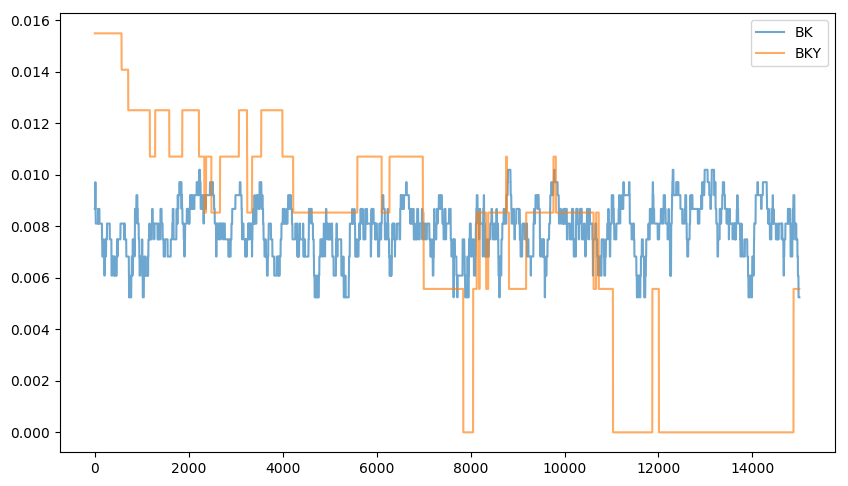

In [10]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, σ_by, label="BK", alpha=0.65)
ax[:plot](1:T, σ_bky, label="BKY", alpha=0.65)
ax[:legend]()

plt.show()